# Day 14: Clustering with K-Means

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
# Here we will attempt to use k-means to try to identify similar digits without using the original
# label information; We will start by loading the digits and then finding the KMeans clusters. 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
# The clustering can be performed as we did before:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

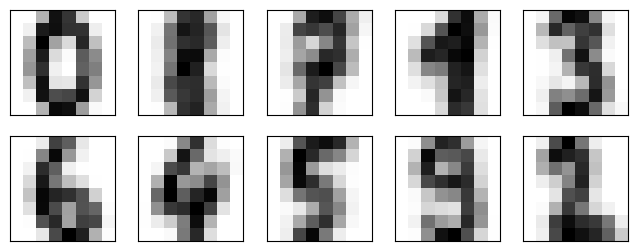

In [5]:
# Let’s see what these cluster centers look like:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [10]:
# Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. 
# We can fix this by matching each learned cluster label with the true labels found in them:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

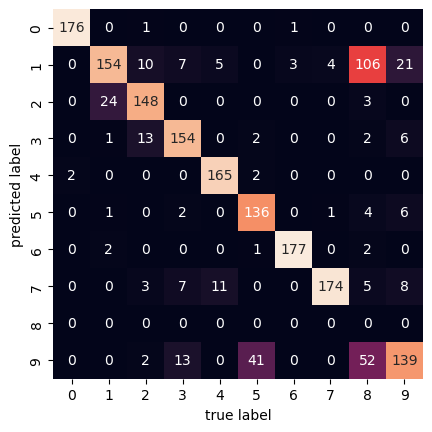

In [13]:
# Now we can check how accurate our unsupervised clustering was in finding similar
# digits within the data:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names,\
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [14]:
# We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to preprocess the 
# data before performing k-means.
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(digits_proj)
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9410127991096272